<a href="https://colab.research.google.com/github/thiago-carneiro/mestrado/blob/master/CBPF_BigData_AulaLoadCatalogLegacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://farm66.staticflickr.com/65535/49055715328_092031af74_o.png"  width="150" />

### CBPF - Centro Brasileiro de Pesquisas Físicas

# Aula 2 - Professor: Clécio R Debom


# Legacy: Accessing Catalog


This notebook will illustrate the basics of accessing the Table Catalogs (fits format), which contains the basic properties of dataset Legacy. credit: Luciana O. Dias.

**Contact:** debom@cbpf.br</font>
/
<a href="www.clearnightsrthebest.com">clearnightsrthebest.com</a>

<font size="2">

Please do not remove this disclaimer.</font>

Resposta anotada do primeiro exercício, por Thiago Carneiro

# Pre-requirements

Download the file catalog from page https://www.dropbox.com/s/pkiccdls9k2jrkz/legacy_dr8_class.fits?dl=0 

In [1]:
!wget -O legacy_dr8_class.fits "https://www.dropbox.com/s/pkiccdls9k2jrkz/legacy_dr8_class.fits?dl=1"
!ls

--2021-09-10 21:55:07--  https://www.dropbox.com/s/pkiccdls9k2jrkz/legacy_dr8_class.fits?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/pkiccdls9k2jrkz/legacy_dr8_class.fits [following]
--2021-09-10 21:55:07--  https://www.dropbox.com/s/dl/pkiccdls9k2jrkz/legacy_dr8_class.fits
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdce47808d70e5cb2c2bbdada1b.dl.dropboxusercontent.com/cd/0/get/BV5Zc3qLT2a0afMjPhPvxgENGcnJnaKoaYlB7Rfe1vZ2nLvpZoX0Hub1kfiJQ29h8Z2CNLa82m76K3hvuCkw64q-4oAs9pFQ7jCdqySTtl4G6h5n7dIjFoTfWtwh2tWeXJXte0vobhABIp15-JxWiqwW/file?dl=1# [following]
--2021-09-10 21:55:07--  https://ucdce47808d70e5cb2c2bbdada1b.dl.dropboxusercontent.com/cd/0/get/BV5Zc3qLT2a0afMjPhPvxgENGcnJnaKoaYlB7Rfe1vZ2nLvpZoX0Hub1kfiJQ

## Import necessary packages

In [2]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn


NOTAS MINHAS (em *itálico*):

*As bibliotecas podem ser importadas integralmente (sem modificador:* import
BIBLIOTECA*), importadas integralmente com apelido (modificador* as: import BIBLIOTECA as APELIDO *) ou terem apenas uma função ou classe importada (*from BIBLIOTECA import FUNCAO_OU_CLASSE*)..


# Open catalog from fits table using astropy package

In [3]:
hdul = fits.open("legacy_dr8_class.fits", ignore_missing_end=True) 
data = hdul[1].data # table extensions can't be the first extension, so there's a dummy image extension at 0
cat_table = Table(data)
cols=cat_table.columns
# print(data)
print(cols)

<TableColumns names=('ra','dec','MAG_R','MAG_G','MAG_Z','MAG_W1','MAG_W2','MAG_W3','MAG_W4','MAGErr_R','MAGErr_G','MAGErr_Z','MAGErr_W1','MAGErr_W2','MAGErr_W3','MAGErr_W4','z','zErr','zmin','zmax','z_spec','training')>


*A primeira linha usa a classe fits para abrir o arquivo e alocar uma variável para acessar seu conteúdo.*

In [4]:
type(hdul)

astropy.io.fits.hdu.hdulist.HDUList

*Aqui vemos que* hdul *é do tipo* HDUList *, que pelo nome deve ser uma classe derivada de* list*. Ou seja, capaz de ser acessada de maneira similar a* list*. Portanto, a segunda linha está usando a semântica* LISTA[ÍNDICE] *para acessar o item de índice 1, ou seja, o segundo item (o primeiro índice é 0) de* hdul *.*

In [5]:
type(data)

astropy.io.fits.fitsrec.FITS_rec

In [6]:
type(cat_table)

astropy.table.table.Table

*A documentação de Table está em:* https://docs.astropy.org/en/stable/table/index.html

In [7]:
data

FITS_rec([(219.08289518, 34.62503564, 22.28020096, 23.84059525, 20.66927719, 19.44267654, 19.87693024, 16.87931633,         nan, 0.0680691 , 0.18660936, 0.01964741, 0.03020275, 0.10241585,  0.11477607, -0.07590012, 0.77890122, 0.08070004, 0.70256203, 0.86396211, -99.   , 0.),
          (219.01868665, 34.6253737 , 20.95097923, 22.23949814, 20.18045044, 19.76469803, 20.02762222, 18.84068298,         nan, 0.02058432, 0.05090846, 0.01575721, 0.04087268, 0.11847699,  0.70656657, -0.79964852, 0.33551112, 0.05468936, 0.2884486 , 0.39782733, -99.   , 0.),
          (218.97638313, 34.62646574, 18.89073944, 20.20539665, 18.10952568, 18.05506516, 18.44773865,         nan,         nan, 0.00501107, 0.01148254, 0.00347257, 0.00908299, 0.02933324, -9.55155468, -0.68285197, 0.21968228, 0.01073454, 0.20906094, 0.23053001,   0.206, 1.),
          ...,
          (221.35793084, 35.0319558 , 21.25609016, 22.79408455, 20.24463654, 18.83496857, 19.02240181, 17.89397049, 16.11078262, 0.05798604, 0.14076409, 0

In [8]:
cat_table

ra,dec,MAG_R,MAG_G,MAG_Z,MAG_W1,MAG_W2,MAG_W3,MAG_W4,MAGErr_R,MAGErr_G,MAGErr_Z,MAGErr_W1,MAGErr_W2,MAGErr_W3,MAGErr_W4,z,zErr,zmin,zmax,z_spec,training
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
219.08289517954503,34.62503563674176,22.280200958251953,23.840595245361328,20.66927719116211,19.442676544189453,19.876930236816406,16.879316329956055,nan,0.06806910037994385,0.18660935759544373,0.01964740641415119,0.030202750116586685,0.10241585224866867,0.11477607488632202,-0.0759001150727272,0.778901219367981,0.08070003986358643,0.7025620341300964,0.8639621138572693,-99.0,0.0
219.018686653907,34.62537369835652,20.950979232788086,22.239498138427734,20.180450439453125,19.764698028564453,20.02762222290039,18.840682983398438,nan,0.020584318786859512,0.05090845748782158,0.015757206827402115,0.04087268188595772,0.1184769868850708,0.706566572189331,-0.7996485233306885,0.33551111817359924,0.05468936264514923,0.28844860196113586,0.3978273272514343,-99.0,0.0
218.9763831277981,34.626465741964694,18.89073944091797,20.20539665222168,18.109525680541992,18.055065155029297,18.447738647460938,nan,nan,0.005011069122701883,0.011482541449368,0.0034725747536867857,0.009082990698516369,0.029333235695958138,-9.551554679870605,-0.6828519701957703,0.21968227624893188,0.01073453575372696,0.209060937166214,0.2305300086736679,0.20600000023841858,1.0
218.92461988134852,34.62559613136096,20.60637092590332,21.781631469726562,19.691598892211914,19.00655746459961,19.443334579467773,20.748811721801758,nan,0.020479494705796242,0.04327033460140228,0.017061179503798485,0.021253490820527077,0.07182589173316956,4.317370414733887,-0.8430752158164978,0.542923092842102,0.05138787627220154,0.4858550429344177,0.5886307954788208,-99.0,0.0
219.10422528282172,34.62584794653823,20.372390747070312,21.050525665283203,20.042388916015625,20.373193740844727,20.97327423095703,19.442487716674805,17.46992301940918,0.018710194155573845,0.025213653221726418,0.022851288318634033,0.07867170870304108,0.3042357563972473,1.281699299812317,1.7885087728500366,0.22720582783222198,0.033312372863292694,0.19105462729930878,0.25767937302589417,-99.0,0.0
219.1401551191026,34.63060062779776,21.168203353881836,22.17804718017578,20.70537757873535,20.669546127319336,21.462276458740234,18.50033187866211,nan,0.026804154738783836,0.050823792815208435,0.02964233234524727,0.09588156640529633,0.44736987352371216,0.5076057314872742,-0.840893566608429,0.4622515141963959,0.06538459658622742,0.3857685327529907,0.5165377259254456,-99.0,0.0
219.07940419061788,34.6265108832743,22.530927658081055,24.709827423095703,21.347169876098633,19.7252197265625,20.46621322631836,18.893774032592773,nan,0.08001420646905899,0.45849671959877014,0.043689291924238205,0.039484284818172455,0.17604960501194,0.7357214689254761,-2.698615789413452,0.7665448784828186,0.05913469195365906,0.7225067615509033,0.8407761454582214,-99.0,0.0
218.95238017111876,34.62802154931848,21.632688522338867,23.299360275268555,20.088136672973633,18.806591033935547,19.501541137695312,18.222618103027344,19.266868591308594,0.04419276863336563,0.15441438555717468,0.015943842008709908,0.017918700352311134,0.07625953108072281,0.41896358132362366,9.755480766296387,0.6852128505706787,0.042052239179611206,0.6466649770736694,0.7307694554328918,-99.0,0.0
219.106935147277,34.62930367862053,21.84273338317871,22.887863159179688,21.388853073120117,21.380495071411133,24.242277145385742,19.018951416015625,16.790895462036133,0.051256872713565826,0.09923253953456879,0.055195972323417664,0.18620175123214722,5.864130020141602,0.8261586427688599,0.9499387741088867,0.43121665716171265,0.09565849602222443,0.34973815083503723,0.5410551428794861,-99.0,0.0


*As duas variáveis parecem ser iguais quando comparamos o print.*

*A quarta linha pega o conteúdo da propriedade* columns *do objeto* cat_tables *e armazena na variável* cols.

# Constructing Pandas DataFrame from Table fits

In [9]:
df = cat_table.to_pandas()
print(df)

                ra        dec      MAG_R  ...      zmax  z_spec  training
0       219.082895  34.625036  22.280201  ...  0.863962 -99.000       0.0
1       219.018687  34.625374  20.950979  ...  0.397827 -99.000       0.0
2       218.976383  34.626466  18.890739  ...  0.230530   0.206       1.0
3       218.924620  34.625596  20.606371  ...  0.588631 -99.000       0.0
4       219.104225  34.625848  20.372391  ...  0.257679 -99.000       0.0
...            ...        ...        ...  ...       ...     ...       ...
203479  221.384627  35.031304  20.289848  ...  0.430521 -99.000       0.0
203480  221.267106  35.032654  22.278854  ...  0.598062 -99.000       0.0
203481  221.357931  35.031956  21.256090  ...  0.568702 -99.000       0.0
203482  221.140035  35.031835  20.928772  ...  0.596554 -99.000       0.0
203483  221.306115  35.032601  22.024387  ...  0.773673 -99.000       0.0

[203484 rows x 22 columns]


*Aqui é invocado o método* to_pandas *do objeto* cat_table *para obter uma instância da classe* pd.DataFrame *com o conteúdo de* cat_table.

In [10]:
type(df)

pandas.core.frame.DataFrame

# Fit mag R, G, Z, W1, W2, W3 e W4 using dataframe plot histogram






In [25]:
# data é apenas um apelido para cat_table
data = cat_table

# Aqui definimos duas 'cores' novas
data['MAG_T1']=data['MAG_R']+data['MAG_W4']
data['MAG_T2']=data['MAG_Z']-data['MAG_T1']

# como fiz a alteração em data, preciso re-converter para atualizar o DataFrame df
df = cat_table.to_pandas()

#checando como ficou o DataFrame
df['MAG_T1']

0               NaN
1               NaN
2               NaN
3               NaN
4         37.842314
            ...    
203479          NaN
203480    37.803313
203481    37.366873
203482          NaN
203483          NaN
Name: MAG_T1, Length: 203484, dtype: float64

<function matplotlib.pyplot.show>

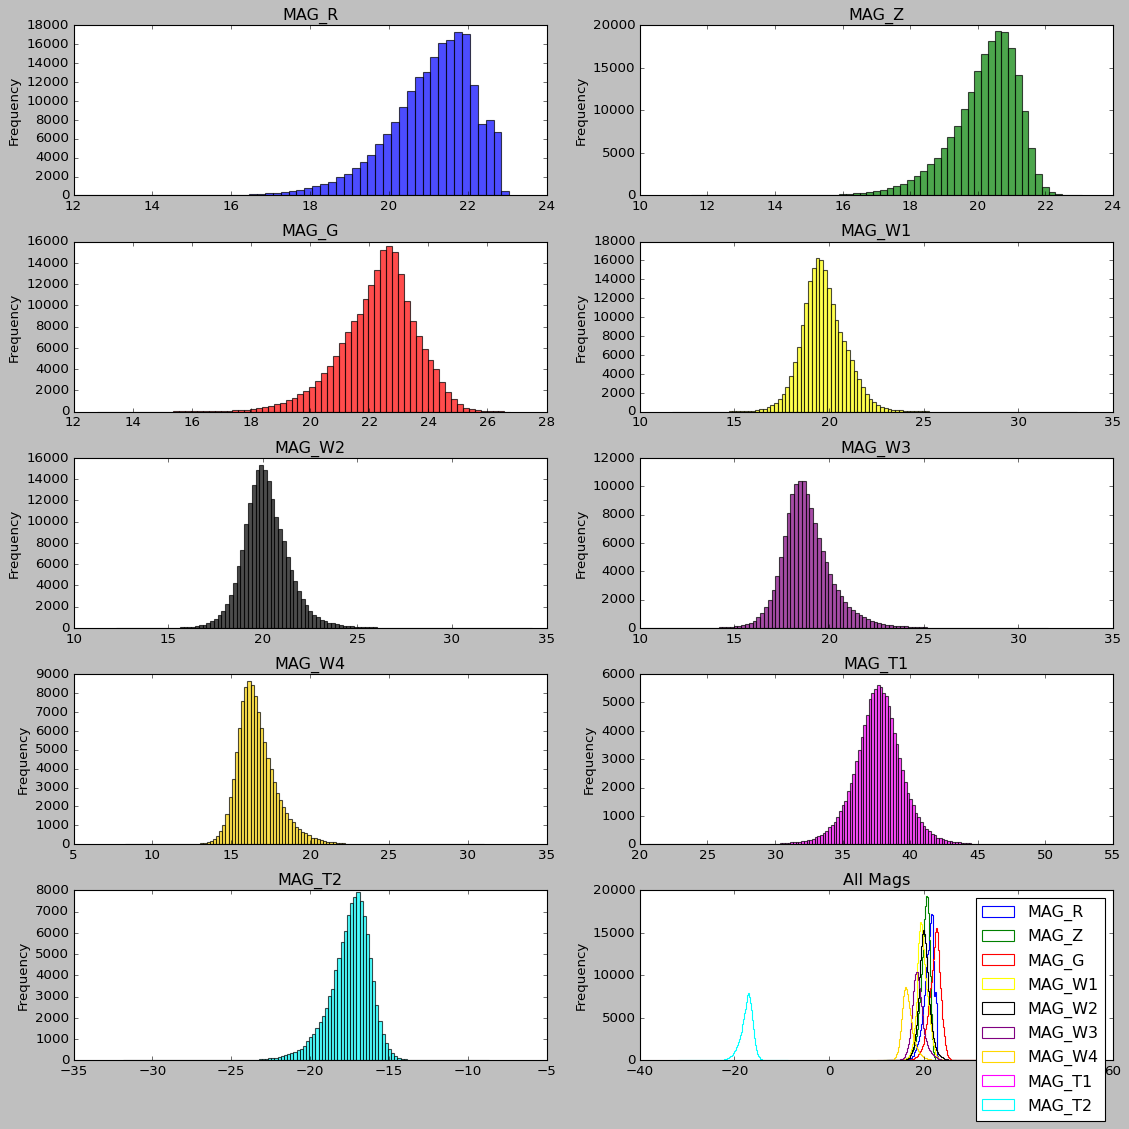

In [23]:
### MAG PLOTS
BANDS = ["R","Z", "G", "W1", "W2", "W3", "W4",'T1','T2']
mags = ['MAG_'+band for band in BANDS]
key_list = mags 
color_list = ['blue', 'green', 'red', 'yellow', 'black', "purple", "gold",'magenta','cyan']
hor = 2
ver = 5

plt.style.use('classic')

fig = plt.figure(figsize=(14, 14), constrained_layout=True)
gs = fig.add_gridspec(ver, hor, left=0.05, right=0.5, wspace=0.05)

i=0
binsize=0.2
def binarange(arr, binsize):
    return np.arange(np.nanmin(arr), np.nanmax(arr)+binsize, binsize)


for v in range(ver-1):
    for h in range(hor): 
        #ax = fig.add_subplot(gs[v, h])
        fig.add_subplot(gs[v, h])
        bins = binarange(data.field(key_list[i]), binsize)
        ax = df[key_list[i]].plot.hist(bins=bins, color=color_list[i], alpha=0.7)
        ax.set_title(key_list[i])
        i+=1

#ax = fig.add_subplot(gs[ver-1, 0])
fig.add_subplot(gs[ver-1, 0])
bins = binarange(data.field(key_list[i]), binsize)
ax = df[key_list[i]].plot.hist(bins=bins, color=color_list[i], alpha=0.7)
ax.set_title(key_list[i])

#ax = fig.add_subplot(gs[ver-1, 1])
fig.add_subplot(gs[ver-1, 1])
for c, key in enumerate(key_list):
    bins = binarange(data.field(key), binsize)
    ax = df[key].plot.hist(bins=bins, color=color_list[c], alpha=1, label=key, histtype='step')
ax.set_title("All Mags")
plt.legend()


plt.show

*Aqui* BANDS *é declarada como uma lista. Em seguinda é usada uma construção especial de python chamada list comprehension para gerar a lista de* mags:


```
['MAG_'+band for band in BANDS]
```
*significa:*

1.   *Para cada item, que iremos chamar de* band*, em* BANDS;
2.   *Será criado um item equivalente na lista, formado pela concatenação do conteúdeo de* band *com o prefixo* 'MAG_'.

*A chamada a* plt.style.use *serve, obviamente, para alterar a aparência (estilo) do gráfico a ser criado.
Em seguida é chamado o contrutor* plt.figure *para criar o objeto que será destino das próximas instruções gráficas.*

In [13]:
type(fig)

matplotlib.figure.Figure

*Novamente, como sempre ocorre quando estamos conhecendo uma biblioteca ou classe nova, vale uma visita na documentação, encontrada facilmente pelo Google:* https://matplotlib.org/3.3.4/api/_as_gen/matplotlib.figure.Figure.html

*Nessa mesma página encontramos a explicação da linha seguinte,* add_gridspec.
*Logo abaixo temos a definição de uma função:*

```
def binarange(arr, binsize):
```
*Essa definição diz que a função binarange vai receber duas variáveis,* arr *e* binsize.
*O corpo da função tem apenas uma linha, que define o valor que ela retorna:*
```
return np.arange(np.nanmin(arr), np.nanmax(arr)+binsize, binsize)
```
*Aqui a função* arange *da biblioteca NumPy é chamada para gerar uma lista entre o valor mínimo e o valor máximo de* arr *, com passos de tamanho* binsize.

*Eu modifiquei um pouco o loop para o fluxo de execução ficar mais claro. O loop varia* v *e* h *para percorrer as linhas e colunas do gráfico, respectivamente. As linhas internas*


```
fig.add_subplot(gs[v, h])
bins = binarange(data.field(key_list[i]), binsize)
ax = df[key_list[i]].plot.hist(bins=bins, color=color_list[i], alpha=0.7)
ax.set_title(key_list[i])
i+=1
```

*adicionam a próxima área de plot, obtém a lista de intervalos dos bins, plotam o histograma, definem o título do histograma, e incrementam* i *em 1, respectivamente.*

*A última linha de gráficos é tratada separadamente, pois vai conter um gráfico que é construído de maneira diferente dos demais. A primeira coluna desta linha é preenchida com gráfico igual aos demais, mas a segunda coluna é criada com os comandos*


```
fig.add_subplot(gs[ver-1, 1])
for c, key in enumerate(key_list):
    bins = binarange(data.field(key), binsize)
    ax = df[key].plot.hist(bins=bins, color=color_list[c], alpha=1, label=key, histtype='step')
ax.set_title("All Mags")
plt.legend()
```

*Aqui temos um loop que usa o comando* enumerate *do python para obter duas variáveis: uma é armazenada em* c *e funciona como um contador (começando com o valor zero, a cada execução do loop seu valor aumenta em 1), enquanto a variável* key *recebe um valor da lista* key_list *a cada execução do loop.*

# Select Pandas Dataframe mag_g < 22 

In [14]:
rslt_df = df[df['MAG_G'] < 22]
print(rslt_df)

                ra        dec      MAG_R  ...  training     MAG_T1     MAG_T2
2       218.976383  34.626466  18.890739  ...       1.0        NaN        NaN
3       218.924620  34.625596  20.606371  ...       0.0        NaN        NaN
4       219.104225  34.625848  20.372391  ...       0.0  37.842314 -17.799925
9       218.854058  34.629541  20.439299  ...       0.0        NaN        NaN
14      219.119427  34.632669  17.951214  ...       1.0  33.825855 -16.403870
...            ...        ...        ...  ...       ...        ...        ...
203456  221.320375  35.019494  20.778296  ...       0.0        NaN        NaN
203457  221.314180  35.020159  19.881739  ...       0.0  37.771784 -18.248861
203461  221.138374  35.021188  20.347160  ...       0.0  37.922089 -17.835411
203464  221.325672  35.022265  20.660891  ...       0.0        NaN        NaN
203468  221.372059  35.024040  20.499336  ...       0.0        NaN        NaN

[72487 rows x 24 columns]


# Mounting your google drive

To mount your google drive:
click in showed link and set your account google get token 

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Saving New Catalog with Pandas Dataframe in csv 


(Google Drive)

In [16]:
rslt_df.to_csv('/content/drive/MyDrive/LegacyCatalog.csv', index=False)


# Loading New Catalog with Pandas Dataframe in csv 

In [17]:
rslt_df = pd.read_csv('/content/drive/MyDrive/LegacyCatalog.csv') 


# Calculating the signal to noise ratio

In [18]:
SNR = 1 / rslt_df["MAGErr_G"].values
Isnr = np.where(SNR > 5)
print(len(Isnr))
print(len(SNR))
print(rslt_df["MAGErr_G"].values)
print(SNR)

1
72487
[0.01148254 0.04327033 0.02521365 ... 0.02133251 0.03973555 0.03121092]
[87.08873418 23.11052154 39.66105154 ... 46.87680546 25.16638238
 32.04006819]


# Fitting with Seaborn diagram color r-i (axis x) and g-r (axis y) 


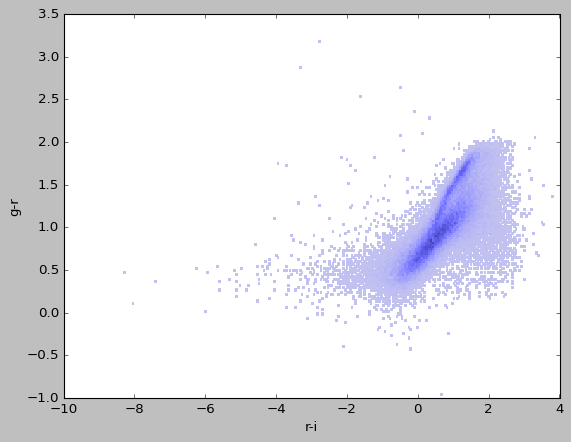

In [19]:
x = rslt_df["MAG_R"].values - rslt_df["MAG_W1"].values
y = rslt_df["MAG_G"].values - rslt_df["MAG_R"].values

d = {'r-i': x, 'g-r': y} # dictionary 
dfplot = pd.DataFrame(data=d) # dictionary to dataframe
# print(dfplot)
# seaborn.scatterplot(data=dfplot, x="r-i", y="g-r")
seaborn.histplot(data=dfplot, x="r-i", y="g-r")

# Plot with seaborn a histogram of the redshifts and save in your google drive

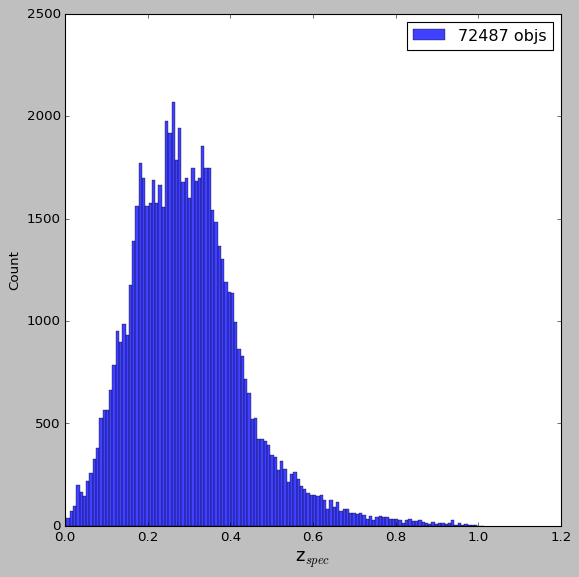

In [20]:
fig = plt.figure(figsize=(8,8))
ax = seaborn.histplot(data=rslt_df, x="z", label=str(rslt_df.shape[0]) + ' objs')
ax.set_xlabel('z$_{spec}$', fontsize=16)
ax.set_ylabel('Count')
plt.legend()
plt.savefig('/content/drive/MyDrive/PlotZ_Legacy.png')


In [21]:
print("######## List files in local google colab:")
# !ls 
print("******** List files in your google drive:")
# !ls drive/MyDrive/ 


######## List files in local google colab:
******** List files in your google drive:
